In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import sys
print(sys.executable)

C:\Users\abdal\Anaconda3\envs\emad\python.exe


In [3]:
def get_images(filepath):
    image = imageio.imread(filepath)
    if len(image.shape) > 2 and image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    image = cv2.resize(image,(50,50))
    image = image/255    
    arr = np.array(image)
    return arr

In [4]:
def ShowFirstFive(images_arr,title):
    fig, axes = plt.subplots(1, 4, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()

In [5]:
fruit_images =[]
fruit_labels = []

In [6]:
base_path = 'dataset/train/'            

fruit_paths = ['freshapples/', 'rottenapples/', 'freshbanana/', 'rottenbanana/', 'freshoranges/', 'rottenoranges/']

In [7]:

for i in range(len(fruit_paths)):
    print(fruit_paths[i])
    for file in listdir(base_path + fruit_paths[i]):
        if file.endswith('.png'):
            file_path = base_path + fruit_paths[i] + file
            image = get_images(file_path)

            fruit_images.append(image)
            fruit_labels.append(i)
        
    

freshapples/
rottenapples/
freshbanana/
rottenbanana/
freshoranges/
rottenoranges/


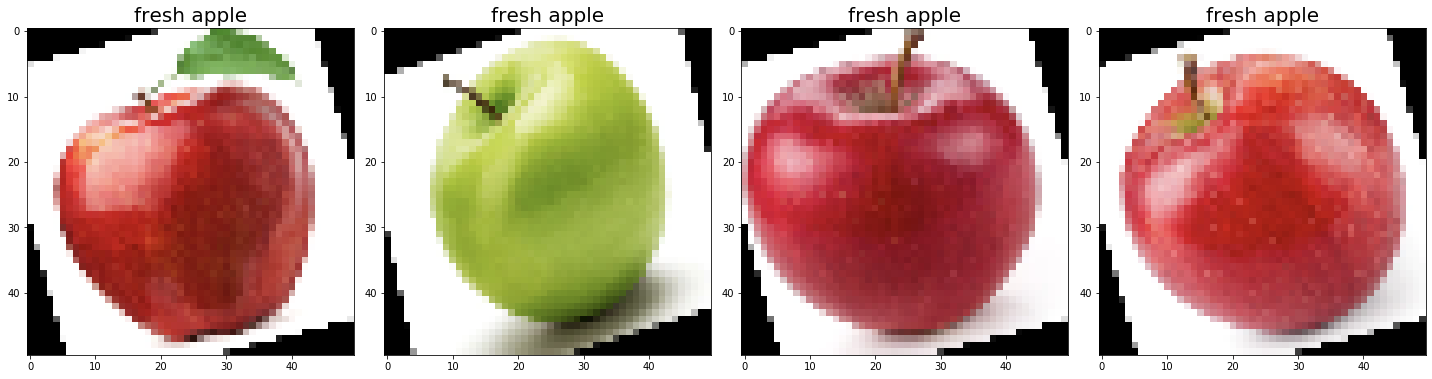

In [8]:
ShowFirstFive(fruit_images,'fresh apple')


In [9]:
def reorder(old_list,order):
    new_list = []
    for i in order:
        new_list.append(old_list[i])
    return new_list

In [10]:
np.random.seed(seed=42)
indices = np.arange(len(fruit_labels))
np.random.shuffle(indices)
indices = indices.tolist()
fruit_labels = reorder(fruit_labels,indices)
fruit_images = reorder(fruit_images,indices)

In [11]:
image_array = np.array(fruit_images)
label_array = np.array(fruit_labels)


In [12]:
label_array = to_categorical(label_array,6)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(image_array,label_array, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [14]:
model =  Sequential([
    
    #convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3),padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),  
    Conv2D(128, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),
    
    # dense layer
    Flatten(),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
    ])
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
l=[8]
for i in range(len(l)):
    
    model.fit(X_train,y_train,epochs=l[i],verbose=1)
    modelsub=model.predict(X_val,batch_size=None, verbose=1)
    c=0
    f=0
    for i in range(modelsub.shape[0]):
        if np.argmax(modelsub[i])==np.argmax(y_val[i]):
            c+=1
        else:
            f+=1
    accuracy=c/(c+f)
    print('Test Accuracy:',accuracy*100)

Epoch 1/8
6104/6104 [==============================] - 4s 612us/step - loss: 0.1489 - accuracy: 0.9468
Epoch 2/8
6104/6104 [==============================] - 4s 644us/step - loss: 0.1508 - accuracy: 0.9446
Epoch 3/8
6104/6104 [==============================] - 4s 609us/step - loss: 0.1098 - accuracy: 0.9586
Epoch 4/8
6104/6104 [==============================] - 3s 545us/step - loss: 0.1069 - accuracy: 0.9595
Epoch 5/8
6104/6104 [==============================] - 3s 547us/step - loss: 0.0901 - accuracy: 0.9654
Epoch 6/8
6104/6104 [==============================] - 4s 635us/step - loss: 0.0720 - accuracy: 0.9743
Epoch 7/8
6104/6104 [==============================] - 3s 569us/step - loss: 0.0867 - accuracy: 0.9697
Epoch 8/8
2616/2616 [==============================] - 1s 287us/step
Test Accuracy: 95.565749235474


In [17]:
model.save('all_8_model.model')

In [18]:
model = tf.keras.models.load_model('all_8_model.model')

modelsub=model.predict(X_test,batch_size=None, verbose=0)
c=0
f=0
for i in range(modelsub.shape[0]):
    if np.argmax(modelsub[i])== np.argmax(y_test[i]):
        c+=1
    else:
        f+=1
accuracy=c/(c+f)
print('Test Accuracy:',accuracy*100)

Test Accuracy: 96.28610729023383


In [19]:
test_base_path = 'dataset/test/'            
test_fruit_paths = ['freshapples/', 'rottenapples/', 'freshbanana/', 'rottenbanana/', 'freshoranges/', 'rottenoranges/']


In [20]:
images = []
lable = []
for i in range(len(test_fruit_paths)):
    print(test_fruit_paths[i])
    for file in listdir(test_base_path + test_fruit_paths[i]):
        if file.endswith('.png'):
            file_path = test_base_path + test_fruit_paths[i] + file
            image = get_images(file_path)

            images.append(image)
            lable.append(i)
        
    

freshapples/
rottenapples/
freshbanana/
rottenbanana/
freshoranges/
rottenoranges/


2698
2698


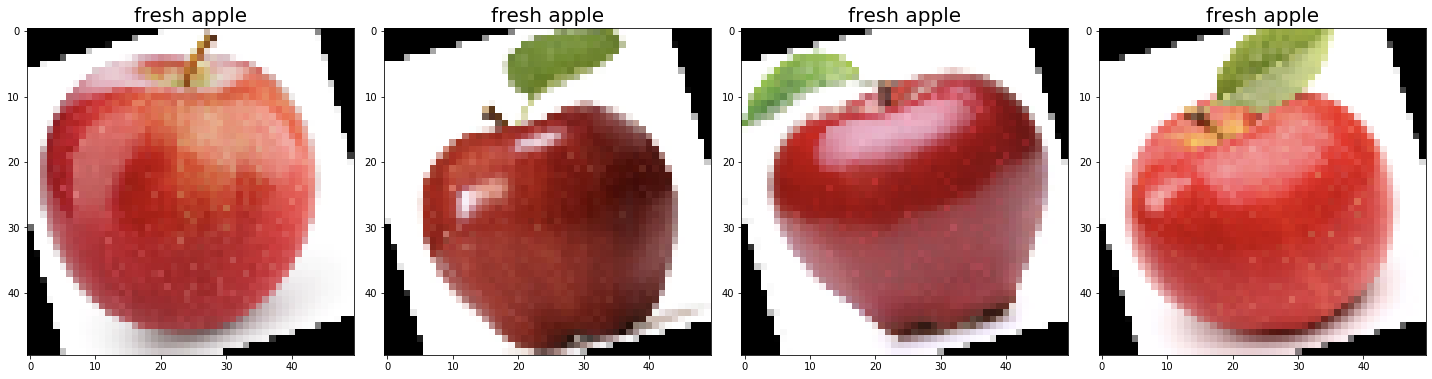

In [21]:
print(len(images))
print(len(lable))
ShowFirstFive(images,'fresh apple')


In [22]:
  
images = np.array(images)
lable = np.array(lable)
lab = to_categorical(np.array(lable),6)

In [23]:
c = 0
f = 0
prediction = model.predict(images, batch_size=None, verbose=0)
for i in range(prediction.shape[0]):
    if np.argmax(prediction[i])== np.argmax(lab[i]):
        c += 1
    else :
        f += 1
            
accuracy=c/(c+f)
print('accuracy = ', accuracy*100)

accuracy =  96.29355077835434


In [24]:
model.evaluate(images, lab, verbose=0)

[0.10745958852553374, 0.9629355]

1/1 [==============================] - 0s 294ms/sample
Fresh Orange


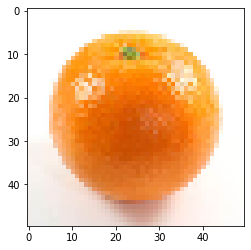

In [28]:
true_lab = to_categorical([0, 1, 2, 3, 4, 5],6)
category = ['Fresh Apple', 'Rotten Apple', 'Fresh Banana', 'Rotten Banana', 'Fresh Orange', 'Rotten Orange']

my_image =[]
my_image.append(get_images(r"C:\Users\abdal\Downloads\4382-grocery.jpg"))


my_image = np.array(my_image)
pre = model.predict_classes(my_image, batch_size=None, verbose=1)
print(category[int(pre)])
#prediction = model.predict(pre)


from matplotlib import pyplot as plt
plt.imshow(my_image[0], interpolation='nearest')
plt.show()
